In [1]:
#Installing the dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #ML dependency that contains lots of ML libraries.
from sklearn.svm import SVR #SupportVectorRegressor
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
#Load the data
!ls ~/library

df =pd.read_csv("~/library/AAPL1.csv")
df.head(7)

AAPL1.csv  README.md  Regression_Stock.ipynb


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-10,277.140015,286.440002,269.369995,285.339996,285.339996,71322500
1,2020-03-11,277.390015,281.220001,271.859985,275.429993,275.429993,63899700
2,2020-03-12,255.940002,270.000000,248.000000,248.229996,248.229996,104618500
3,2020-03-13,264.890015,279.920013,252.949997,277.970001,277.970001,92683000
4,2020-03-16,241.949997,259.079987,240.000000,242.210007,242.210007,80605900
5,2020-03-17,247.509995,257.609985,238.399994,252.860001,252.860001,81014000
6,2020-03-18,239.770004,250.000000,237.119995,246.669998,246.669998,75058400


In [3]:
#Create the lists X and Y data sets
dates = []
prices = []

In [4]:
#Get the number of rows and columns in the data set
df.shape

(23, 7)

In [5]:
#Displaying Last row
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
22,2020-04-09,268.700012,270.070007,264.700012,267.98999,267.98999,40529100


In [6]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-10,277.140015,286.440002,269.369995,285.339996,285.339996,71322500
1,2020-03-11,277.390015,281.220001,271.859985,275.429993,275.429993,63899700
2,2020-03-12,255.940002,270.000000,248.000000,248.229996,248.229996,104618500
3,2020-03-13,264.890015,279.920013,252.949997,277.970001,277.970001,92683000
4,2020-03-16,241.949997,259.079987,240.000000,242.210007,242.210007,80605900
5,2020-03-17,247.509995,257.609985,238.399994,252.860001,252.860001,81014000
6,2020-03-18,239.770004,250.000000,237.119995,246.669998,246.669998,75058400
7,2020-03-19,247.389999,252.839996,242.610001,244.779999,244.779999,67964300
8,2020-03-20,247.179993,251.830002,228.000000,229.240005,229.240005,100423300
9,2020-03-23,228.080002,228.500000,212.610001,224.369995,224.369995,84188200


In [7]:
#To check whether the last row is omitted or not
df.shape

(22, 7)

In [8]:
#Get all of the rows from the Date Column
df_dates = df.loc[:, 'Date']
#Get all of the rows from the Open Column
df_open = df.loc[:, 'Open']

In [9]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [10]:
#Printing all the dates in the updated date list
print(df_dates)

0     2020-03-10
1     2020-03-11
2     2020-03-12
3     2020-03-13
4     2020-03-16
5     2020-03-17
6     2020-03-18
7     2020-03-19
8     2020-03-20
9     2020-03-23
10    2020-03-24
11    2020-03-25
12    2020-03-26
13    2020-03-27
14    2020-03-30
15    2020-03-31
16    2020-04-01
17    2020-04-02
18    2020-04-03
19    2020-04-06
20    2020-04-07
21    2020-04-08
Name: Date, dtype: object


In [11]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [12]:
print(dates)

[[10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8]]


In [13]:
def predict_prices(dates, prices, x):
  
  #Creaing the 3 SVR models
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Training the SVR models 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #Creating the Linear Regression model
  lin_reg = LinearRegression()
  #Training the Linear Regression model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


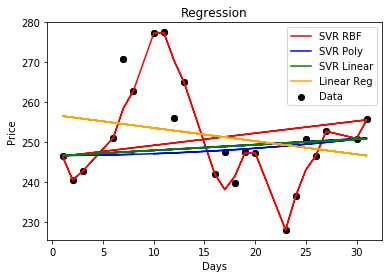

(269.33979828559785, 247.7144841379676, 246.95951102141777, 253.80782867301866)


In [14]:
#Predict the price of Apple on 09 April
predicted_price = predict_prices(dates, prices, [[9]])
print(predicted_price)